In [2]:
# Imports
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [47]:
# Creating a dataframe
df = pd.DataFrame({
    'x': [1,2,3,4,5,6,7,8,9,10],
    'y': [3*x - 2.222 for x in range(1,11)]
})

In [48]:
# Adding an outlier with high leverage
df2 = pd.DataFrame({'x': 12, 'y': 0.5}, index=[0])
df = pd.concat([df, df2]).reset_index(drop=True)

In [49]:
#Display
df

,x,y
0,1,0.778
1,2,3.778
2,3,6.778
3,4,9.778
4,5,12.778
5,6,15.778
6,7,18.778
7,8,21.778
8,9,24.778
9,10,27.778


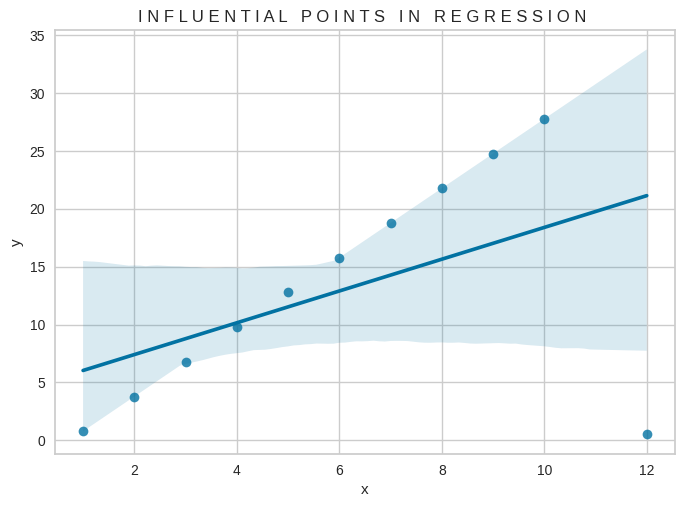

In [50]:
# Plot regression
sns.regplot(df, x='x', y='y').set_title('I N F L U E N T I A L   P O I N T S   I N   R E G R E S S I O N ');

In [40]:
# Fit regression Model
lm = sm.OLS(df.x, df.y).fit()

In [41]:
# Regression Summary
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                      x   R-squared (uncentered):                   0.733
Model:                            OLS   Adj. R-squared (uncentered):              0.707
Method:                 Least Squares   F-statistic:                              27.51
Date:                Wed, 10 Apr 2024   Prob (F-statistic):                    0.000376
Time:                        02:12:44   Log-Likelihood:                         -29.639
No. Observations:                  11   AIC:                                      61.28
Df Residuals:                      10   BIC:                                      61.68
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [42]:
# Get Influence values.
#Look at dfb_y. Notice how the leverage point on index 10 is the highest value of all
lm.get_influence().summary_frame()

,dfb_y,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.002649,0.000008,0.188930,0.000218,0.002787,0.179556,0.002649
1,0.010727,0.000128,0.157240,0.005132,0.011293,0.149356,0.010727
2,0.015480,0.000266,0.125807,0.016518,0.016304,0.119445,0.015480
3,0.016891,0.000317,0.094326,0.034375,0.017797,0.089525,0.016891
4,0.014805,0.000243,0.062479,0.058704,0.015603,0.059284,0.014805
5,0.008898,0.000088,0.029914,0.089505,0.009379,0.028381,0.008898
6,-0.001365,0.000002,-0.003776,0.126777,-0.001439,-0.003582,-0.001365
7,-0.016816,0.000314,-0.039090,0.170521,-0.017724,-0.037087,-0.016816
8,-0.038720,0.001665,-0.076663,0.220737,-0.040802,-0.072750,-0.038720
9,-0.069026,0.005287,-0.117344,0.277424,-0.072710,-0.111399,-0.069026


In [43]:
from yellowbrick.regressor import CooksDistance

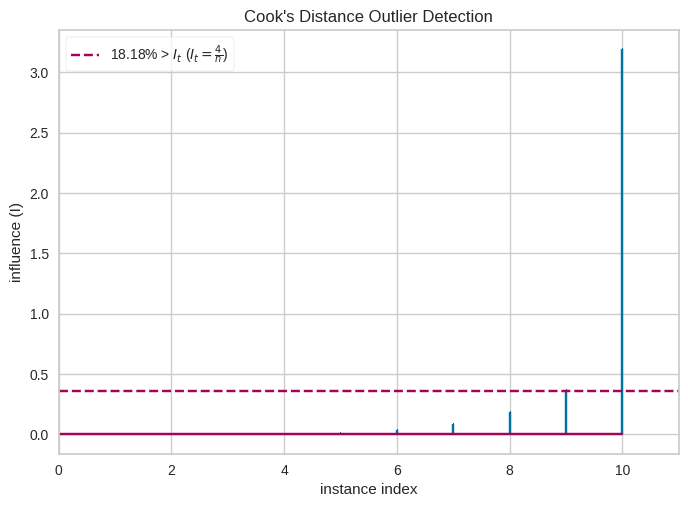

<Axes: title={'center': "Cook's Distance Outlier Detection"}, xlabel='instance index', ylabel='influence (I)'>

In [44]:
# Another quick way to do it, using yellowbricks
ck = CooksDistance()
ck.fit(df[['x']], df.y)
ck.show()